#**Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow**

Computer vision ios the practice of writing algorithm which can discover patterns in visual data. Such as the camera of the self-driving car recoginizing the objects in front.

##Get data

The imaged we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza🍕 & steak🥩) using the image data modification notebook

**Note**🗝️: We start with a smaller datasest so we can experiment quickly and figure what works(or better yet what doesn't work) before scalling up

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

#Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-08 04:11:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.8MB/s    in 3.2s    

2023-06-08 04:11:59 (32.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becomming one with the data.

And for a computer vision project.... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
#Walk through pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`.")

There are 2 directories and 0 images in `pizza_steak`.
There are 2 directories and 0 images in `pizza_steak/test`.
There are 0 directories and 250 images in `pizza_steak/test/pizza`.
There are 0 directories and 250 images in `pizza_steak/test/steak`.
There are 2 directories and 0 images in `pizza_steak/train`.
There are 0 directories and 750 images in `pizza_steak/train/pizza`.
There are 0 directories and 750 images in `pizza_steak/train/steak`.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

To visualize our images, first let's get the class names programmatically.

In [ ]:
#To get the classname programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [2]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
 target_folder=target_dir+target_class
 #Get a random image path
 random_image=random.sample(os.listdir(target_folder),1)
 print(random_image)
 #Read in the image and plot it using matplotlib
 img=mpimg.imread(target_folder+"/"+random_image[0])
 plt.imshow(img)
 plt.title(target_class)
 plt.axis("off")

 print(f"Image shape: {img.shape}") # show the shape of the image
 return img




['1624450.jpg']
Image shape: (512, 512, 3)


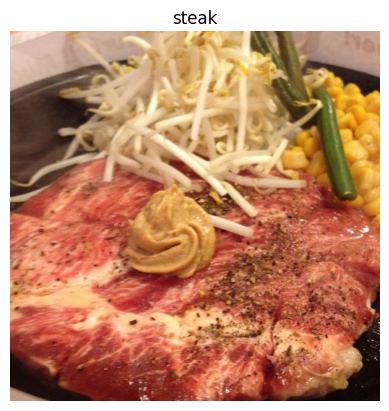

In [ ]:
#View a  random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

In [ ]:
#The images we've imported and plotted are actually gaint aarrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[229, 176, 122],
        [229, 176, 124],
        [228, 175, 123],
        ...,
        [200, 164, 142],
        [201, 163, 142],
        [201, 163, 142]],

       [[225, 173, 123],
        [225, 173, 125],
        [226, 174, 126],
        ...,
        [199, 163, 141],
        [200, 162, 141],
        [200, 162, 141]],

       [[223, 172, 129],
        [223, 174, 133],
        [225, 176, 135],
        ...,
        [200, 163, 144],
        [201, 164, 145],
        [203, 165, 146]],

       ...,

       [[186, 148, 125],
        [187, 149, 126],
        [188, 150, 127],
        ...,
        [ 22,  11,   9],
        [ 22,  11,   7],
        [ 22,  11,   7]],

       [[187, 149, 126],
        [188, 150, 127],
        [189, 151, 128],
        ...,
        [ 23,  12,  10],
        [ 23,  12,   8],
        [ 24,  13,   9]],

       [[188, 150, 127],
        [189, 151, 128],
        [190, 152, 129],
        ...,
        [ 25,  14,  1

In [ ]:
#View the image shape
img.shape # returns width,height,colour channels

(512, 512, 3)

🗝️**Note**: As we've discussed before, many machhine learning models, including neural networks prefer the values they work with to be betweem 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
#Get all the pixel values between 0 & 1
img/255

array([[[0.89803922, 0.69019608, 0.47843137],
        [0.89803922, 0.69019608, 0.48627451],
        [0.89411765, 0.68627451, 0.48235294],
        ...,
        [0.78431373, 0.64313725, 0.55686275],
        [0.78823529, 0.63921569, 0.55686275],
        [0.78823529, 0.63921569, 0.55686275]],

       [[0.88235294, 0.67843137, 0.48235294],
        [0.88235294, 0.67843137, 0.49019608],
        [0.88627451, 0.68235294, 0.49411765],
        ...,
        [0.78039216, 0.63921569, 0.55294118],
        [0.78431373, 0.63529412, 0.55294118],
        [0.78431373, 0.63529412, 0.55294118]],

       [[0.8745098 , 0.6745098 , 0.50588235],
        [0.8745098 , 0.68235294, 0.52156863],
        [0.88235294, 0.69019608, 0.52941176],
        ...,
        [0.78431373, 0.63921569, 0.56470588],
        [0.78823529, 0.64313725, 0.56862745],
        [0.79607843, 0.64705882, 0.57254902]],

       ...,

       [[0.72941176, 0.58039216, 0.49019608],
        [0.73333333, 0.58431373, 0.49411765],
        [0.7372549 , 0

## An end-to-end example 

Let's build a convolutional neural netwoek to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224), #target_size is used to resize the image to a standard size to avoid confusions
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

#Fit the model
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 390ms/step - loss: 0.6579 - accuracy: 0.5947 - val_loss: 0.5214 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4895 - accuracy: 0.7700 - val_loss: 0.4030 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4222 - accuracy: 0.8127 - val_loss: 0.3449 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3933 - accuracy: 0.8287 - val_loss: 0.3264 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3394 - accuracy: 0.8613 - val_loss: 0.3544 - val_accuracy: 0.8520


> 🗝️**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before 
Let's replicate the model we've biuilt in a previous section to see if it works with our image data.

The model we're building is from the Tensorflow Playground

In [ ]:
 # Set the random seed
 tf.random.set_seed(42)

 #Create a model to replicate the TensorFlow Playground model
 model_2=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')

 ])
 
 model_2.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=['accuracy'])

# FIt the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
#Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#Create the model (same as above but let's step it up a notch)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')

])
#Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

hitsory_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 7.5046 - accuracy: 0.5040 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 259ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model 
6. Adjust different parametes and improve the model(try to beat our baseline)
7. Repeat until satisfied 

##1.Become one with the data

['2357281.jpg']
Image shape: (512, 512, 3)
['1708197.jpg']
Image shape: (512, 512, 3)


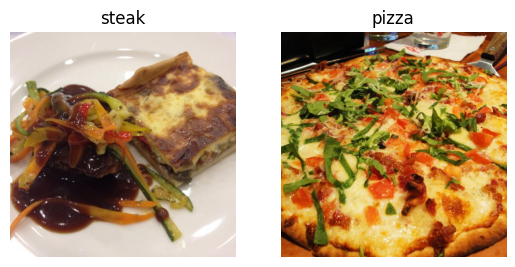

In [ ]:
#Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


## 2.Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


Our next step is to turn our data into **batches**.
A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


Why 32?

Because 32 is good for your health.... https://twitter.com/ylecun/status/989610208497360896?s=20 


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from directories and turn them into batches 
train_data= train_datagen.flow_from_directory(directory=train_dir, #target size of images
                                                target_size=(224,224), #target size of images (height,width)
                                                class_mode="binary",  # type of data you're working with
                                                batch_size=32) # size of minibatches to load data into

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch
images, labels= train_data.next() # get the "next" batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

>🗝️**Note** In deep learning, there is almost an infinite amount of architectures you could create. So on of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model (this will be our baseline, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows going across an input (higher = more complex model)  
           kernel_size=3,  #the size of the sliding window going across an input
           strides=1,      #if "same", output shape is same as input shape, if 'valid', output shape gets compressed
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), #input layer (specify input shape)
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
#Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data),len(test_data),

(47, 16)

In [ ]:
#Fit the model
history_4=model_4.fit(train_data, #this is the combination of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 16s 279ms/step - loss: 0.6300 - accuracy: 0.7140 - val_loss: 0.5468 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4318 - accuracy: 0.8067 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.2585 - accuracy: 0.9067 - val_loss: 0.5566 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.1168 - accuracy: 0.9707 - val_loss: 0.4950 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.0260 - accuracy: 0.9960 - val_loss: 0.5966 - val_accuracy: 0.8160


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 157ms/step - loss: 0.3544 - accuracy: 0.8520


[0.35437485575675964, 0.8519999980926514]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

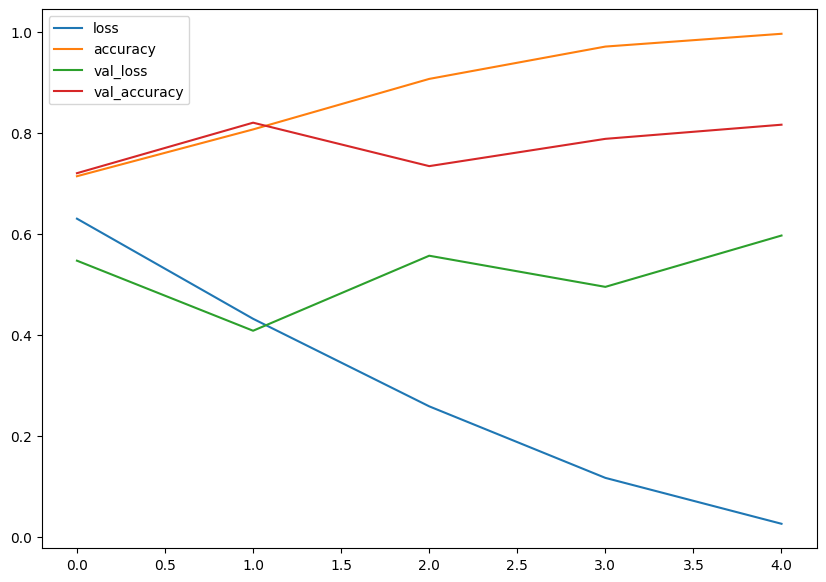

In [ ]:
#Training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [3]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss'])) #how many epochs did we run for

  # Plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()


  #plot the accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()


🗝️**Note:** When a model's **validation loss starts to increase** , it;s likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training  dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

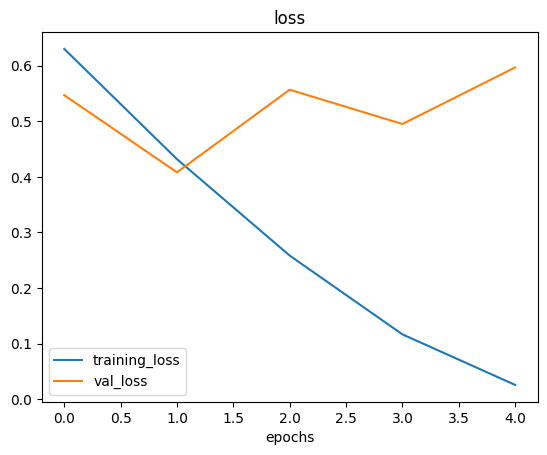

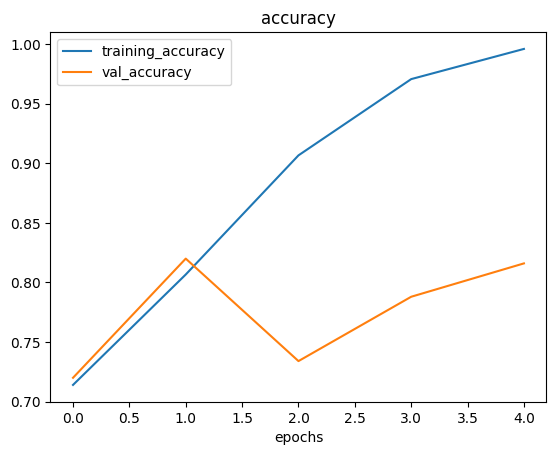

In [ ]:
#Check our the loss and accuracy of model_4 
plot_loss_curves(history_4)


🗝️**Note:** Ideally the two loss curves (training and validation) will be very similar to each other 




## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting


Ways to induce overfitting:
* Increase the number of conv layers 
* Increase the number of conv filters
* Add another Dense layer to the output of our flattened layer

Reduce over fitting:
* Add data augumentation 
* Add regularization layers(such as MaxPool2D)
* Add more data....

>🗝️**Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
#Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 13s 226ms/step - loss: 0.6310 - accuracy: 0.6133 - val_loss: 0.4675 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4633 - accuracy: 0.7993 - val_loss: 0.3905 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4244 - accuracy: 0.8107 - val_loss: 0.3625 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4060 - accuracy: 0.8187 - val_loss: 0.3855 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3860 - accuracy: 0.8353 - val_loss: 0.3418 - val_accuracy: 0.8400


In [ ]:
#Get the summary of our model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

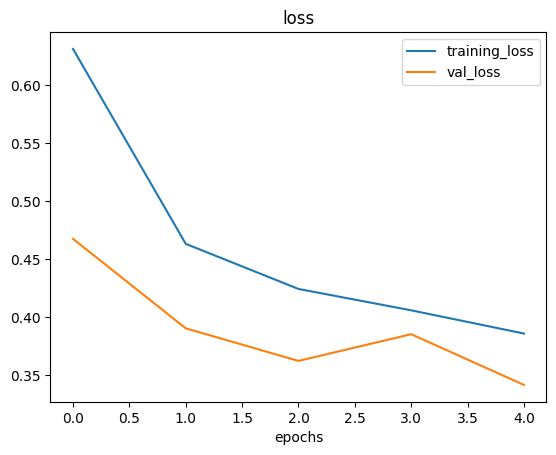

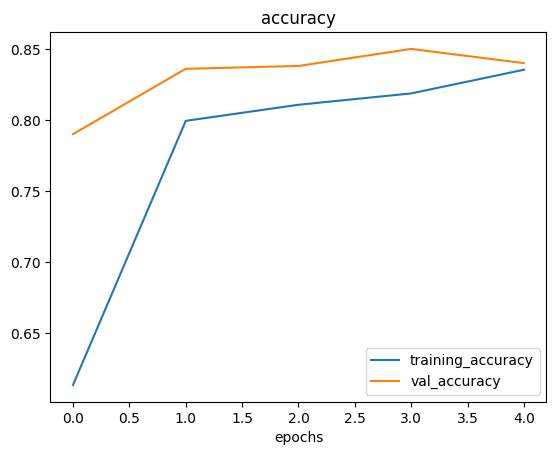

In [ ]:
#Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augumentation

In [ ]:
# Create ImageDataGenerator training instance with data augumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,  #how much do you want to rotate an image?
                                              shear_range=0.2,      #How much do you want to shear an image
                                              zoom_range=0.2,      #zoom in randomly on an image
                                              width_shift_range=0.2, # move your image around on the x-axis
                                              height_shift_range=0.3, #move your image on the y-axis
                                              horizontal_flip=True   #do you want to flip the image?
                                              )

# Create ImageDataGenerator without data augumentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#Create ImageDataGeneratori without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

>🤔**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image,flipping it, cropping it or something similar.

Let's write some code to visualize data augme

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)         #for demonstration purpose only

#Create non-augmented train data batches
print("Non-augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

IMG_SIZE=(224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

# test_data_augmented=test_datagen_augmented.flow_from_directory(test_dir,
#                                                                target_size=IMG_SIZE,
#                                                                batch_size=32,
#                                                                class_mode="binary",
#                                                                shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


>🗝️**Note:** Data augmentation is usually only perform on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.


Finally.... let's visualize some augmented data!!!

In [ ]:
# Get sample augmented
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented.... only data(images)

showing image number: 21


(-0.5, 223.5, 223.5, -0.5)

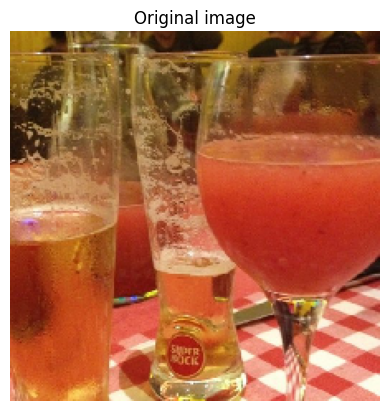

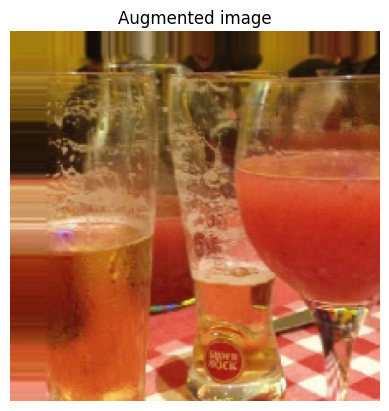

In [ ]:
#Show original image and augmented image
import random
random_number = random.randint(0,31) # our batch sizes are 32.......
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


Now we've seen whar augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
#Create the a model (same as model_5)
model_6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])
#Fit the model
history_6=model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 506ms/step - loss: 0.7102 - accuracy: 0.4720 - val_loss: 0.6830 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6935 - accuracy: 0.4713 - val_loss: 0.6760 - val_accuracy: 0.5400
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6848 - accuracy: 0.5893 - val_loss: 0.6668 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6839 - accuracy: 0.5547 - val_loss: 0.6460 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6537 - accuracy: 0.6367 - val_loss: 0.6281 - val_accuracy: 0.5920


In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.6281 - accuracy: 0.5920


[0.6280627250671387, 0.5920000076293945]

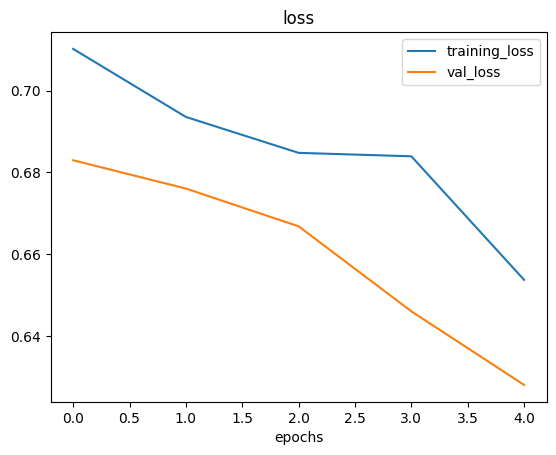

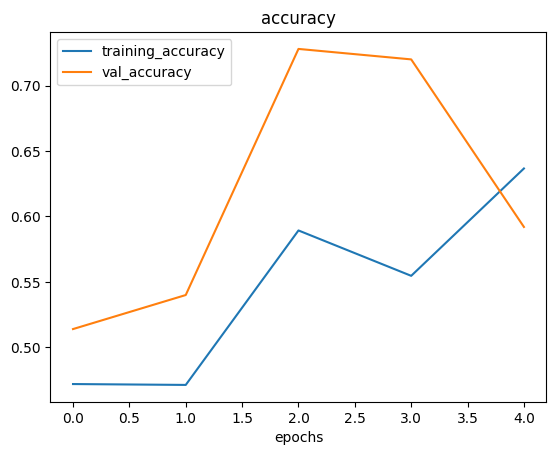

In [ ]:
#Check our model's training curves
plot_loss_curves(history_6)

 Let's shuffle our augmented training data and train another model(same as before) on it and see what happens 

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_aug_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     class_mode="binary",
                                                                     batch_size=32,
                                                                     shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
#Create the model (same as model_5 and model_6) 
model_7=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7=model_7.fit(train_data_aug_shuffled,
                      epochs=10,
                      steps_per_epoch=len(train_data_aug_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 491ms/step - loss: 0.6358 - accuracy: 0.6467 - val_loss: 0.4619 - val_accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 23s 495ms/step - loss: 0.5650 - accuracy: 0.7227 - val_loss: 0.4872 - val_accuracy: 0.8060
Epoch 3/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5483 - accuracy: 0.7347 - val_loss: 0.5867 - val_accuracy: 0.7160
Epoch 4/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5454 - accuracy: 0.7313 - val_loss: 0.3889 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 23s 494ms/step - loss: 0.5266 - accuracy: 0.7573 - val_loss: 0.4396 - val_accuracy: 0.7920
Epoch 6/10
47/47 [==============================] - 23s 493ms/step - loss: 0.5005 - accuracy: 0.7633 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 7/10
47/47 [==============================] - 23s 493ms/step - loss: 0.4716 - accuracy: 0.7847 - val_loss: 0.4365 - val_accuracy: 0.8120

In [ ]:
model_7.evaluate(test_data)

16/16 [==============================] - 3s 183ms/step - loss: 0.4208 - accuracy: 0.8100


[0.42076414823532104, 0.8100000023841858]

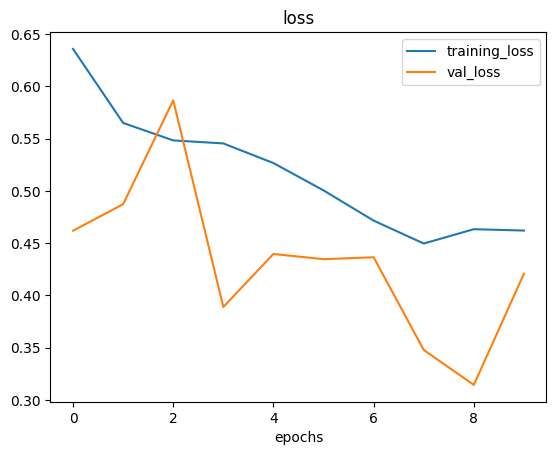

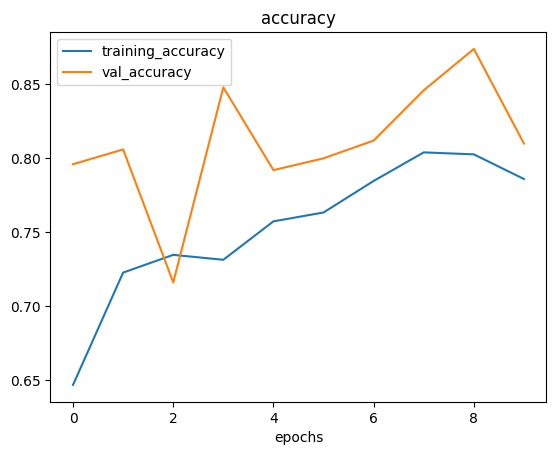

In [ ]:
plot_loss_curves(history_7)

🗝️**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

## 7. Repeat until satisfied

Since we've already beatedn our baseline, there are a few things we could try to continue to improve our model:
* Increase then number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn
* Use **transfer learning** to leverage what another image mode  has learn and adjust it for our own use case


>⚒️**Practice** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffle training data.


## Making a prediction with our trained model on our own custom data

In [ ]:
#Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-06-08 04:51:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-06-08 04:51:29 (32.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

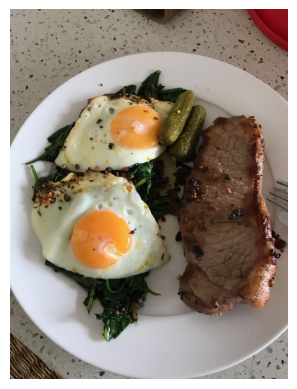

In [ ]:
#View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

>🗝️**Note** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [4]:
#Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape,colour_channels).
  """
  # Read in the image
  img=tf.io.read_file(filename)
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image (get all values between 0 and 1)
  img=img/255
  return img

In [ ]:
#Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 179ms/step


Looks like our custom image is being put through our model, however it currently outputs a prediction probability wouldn't it be nice if we could visualize the image as well as the model's precdictions

In [5]:
# Remind ourselve of our class names
class_names 

NameError: ignored

In [ ]:
#We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [45]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  #Import the target image and preprocess it
  img=load_and_prep_image(filename)
  #make a prediction 
  pred= model.predict(tf.expand_dims(img,axis=0))
  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


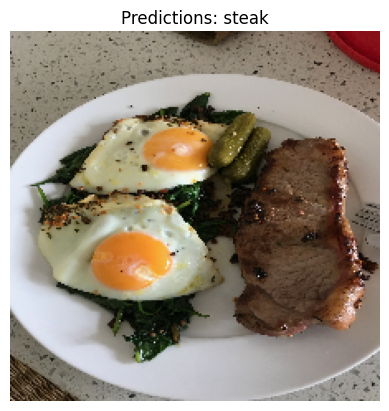

In [ ]:
#Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

Our model works! Let's try it on another image this time pizza

--2023-06-08 04:51:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-06-08 04:51:32 (41.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


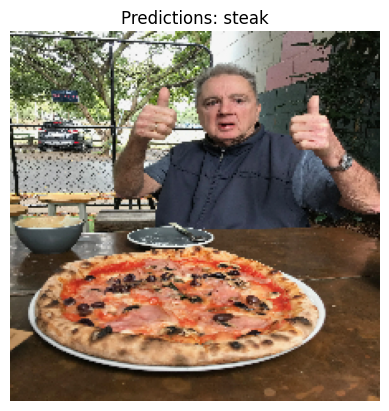

In [ ]:
# Download another test custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

1/1 [==============================] - 0s 18ms/step


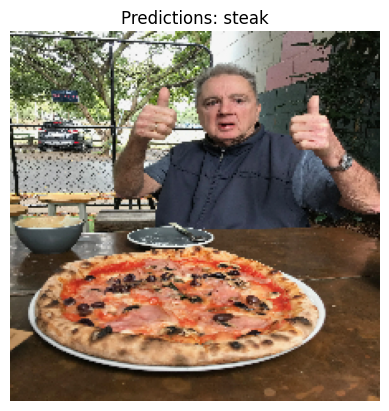

In [ ]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

#Multi-Class Image classification 

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), noow we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data(get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the mode
6. Adjust different hyperparameters and improve the model(try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1.Import and become one with the data

In [6]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-06-08 15:32:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  60.5MB/s    in 6.1s    

2023-06-08 15:32:26 (81.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
#Unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [8]:
import os 
#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in '10_food_classes_all_data'.
There are 10 directories and 0 image in '10_food_classes_all_data/test'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ice_cream'.
There are 10 directori

In [9]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun  8 15:32 .
drwxr-xr-x  1 root root 4096 Jun  8 15:32 ..
drwxr-xr-x 12 root root 4096 Jun  8 15:32 test
drwxr-xr-x 12 root root 4096 Jun  8 15:32 train


In [10]:
#Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [11]:
#Let's get the class name
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2184165.jpg']
Image shape: (512, 512, 3)


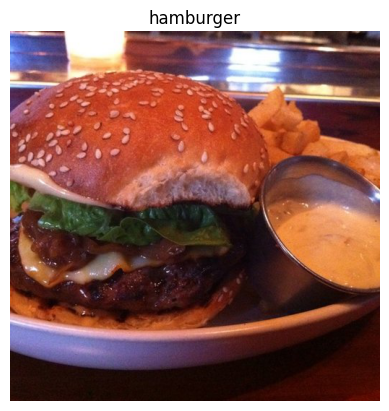

In [12]:
#Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names),
                        )

## 2. Preprocess the data (prepare it for a model)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website.....
how about we just take their model (also on 10 classes) and use it for our problem

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
#Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') #Changed to have 10 output neurons use the softmax activation function
    
])

#Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


## 4. Fit the model

In [15]:
#Fit the model
history_8=model_8.fit(train_data, #10 differrent classes
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 222ms/step - loss: 2.1238 - accuracy: 0.2275 - val_loss: 1.9947 - val_accuracy: 0.2860
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.8202 - accuracy: 0.3715 - val_loss: 1.8369 - val_accuracy: 0.3648
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 1.4162 - accuracy: 0.5359 - val_loss: 1.9524 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.7944 - accuracy: 0.7416 - val_loss: 2.5271 - val_accuracy: 0.2780
Epoch 5/5
235/235 [==============================] - 50s 215ms/step - loss: 0.3079 - accuracy: 0.9047 - val_loss: 3.6112 - val_accuracy: 0.2812


## 5. Evaluate the model

In [16]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 3.6112 - accuracy: 0.2812


[3.6112020015716553, 0.28119999170303345]

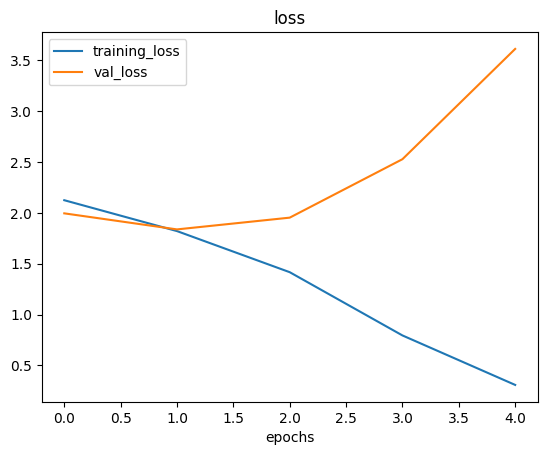

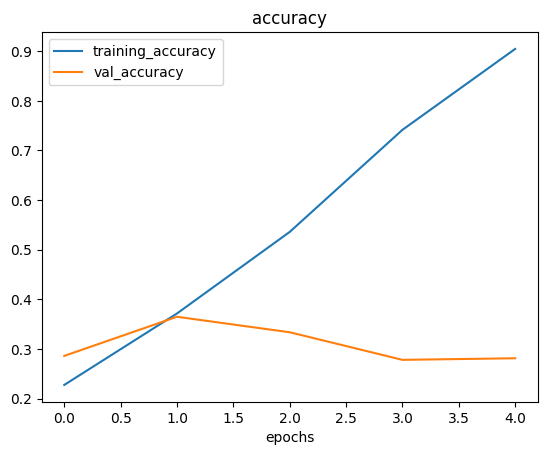

In [17]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the traingin set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on its training data, it's clear our model is learning something,....

However, it's not generalising well to unseen data. (overfitting)

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns..
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own datasets.

In [18]:
# how about we try and simplify the model first?
# Let's try to remove 2 convolutional layers....

model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [19]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [28]:
# Fit the model with 2x conv layers removed
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.5968 - accuracy: 0.8295 - val_loss: 2.4582 - val_accuracy: 0.3180
Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 0.3104 - accuracy: 0.9223 - val_loss: 2.8323 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 0.1538 - accuracy: 0.9719 - val_loss: 3.1448 - val_accuracy: 0.3008
Epoch 3/5
235/235 [==============================] - 47s 200ms/step - loss: 0.0725 - accuracy: 0.9907 - val_loss: 3.6382 - val_accuracy: 0.2932
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 0.0340 - accuracy: 0.9968 - val_loss: 3.9890 - val_accuracy: 0.2964
Epoch 5/5
235/235 [==============================] - 47s 201ms/step - loss: 0.0161 - accuracy: 0.9996 - val_loss: 4.2199 - val_accuracy: 0.2996


In [21]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [22]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 2.4582 - accuracy: 0.3180


[2.4582104682922363, 0.3179999887943268]

In [ ]:
plot_loss_curves(history_9)

In [24]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [25]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [26]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 149ms/step - loss: 2.4582 - accuracy: 0.3180


[2.4582107067108154, 0.3179999887943268]


Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued....

How about we try data augmentation?

## Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data.....

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [32]:
# Create an augmented data generator instance
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [36]:
# Let's create another model but this time we'll fit it ono the augmented training data of 10 classes
model_10=tf.keras.models.clone_model(model_8)

#Compile the clones model (using the same setup as previous model)

model_10.compile(loss='categorical_crossentropy',
                 optimizer="Adam",
                 metrics=['accuracy'])

history_10=model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 518ms/step - loss: 2.2669 - accuracy: 0.1391 - val_loss: 2.1650 - val_accuracy: 0.2148
Epoch 2/5
235/235 [==============================] - 128s 544ms/step - loss: 2.1633 - accuracy: 0.2172 - val_loss: 2.0245 - val_accuracy: 0.2780
Epoch 3/5
235/235 [==============================] - 121s 515ms/step - loss: 2.0963 - accuracy: 0.2427 - val_loss: 2.0857 - val_accuracy: 0.2756
Epoch 4/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0531 - accuracy: 0.2728 - val_loss: 1.9111 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 123s 523ms/step - loss: 2.0002 - accuracy: 0.2953 - val_loss: 1.8276 - val_accuracy: 0.3768


In [34]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [37]:
model_8.evaluate(test_data)

79/79 [==============================] - 18s 229ms/step - loss: 3.6112 - accuracy: 0.2812


[3.611201524734497, 0.28119999170303345]

In [38]:
model_10.evaluate(test_data)

79/79 [==============================] - 18s 226ms/step - loss: 1.8276 - accuracy: 0.3768


[1.827641248703003, 0.376800000667572]

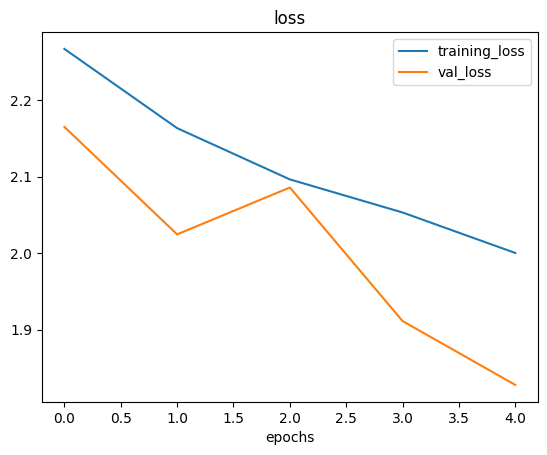

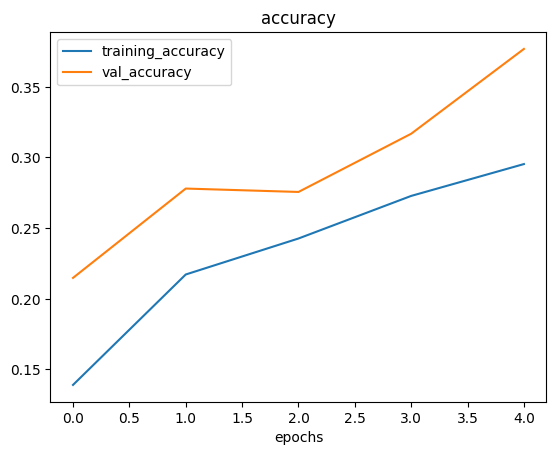

In [39]:
#Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

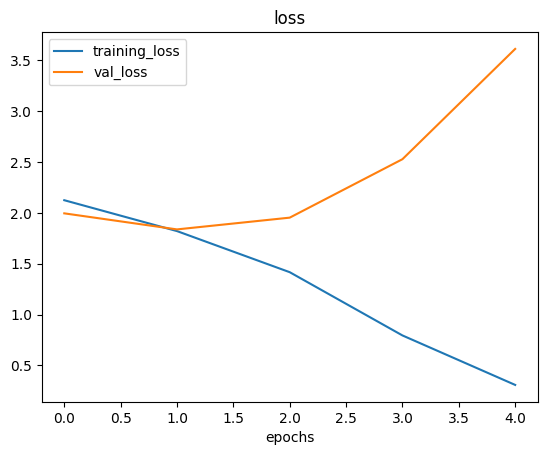

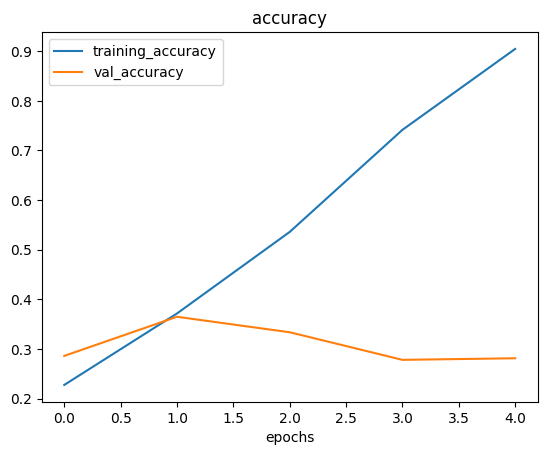

In [40]:
plot_loss_curves(history_8)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, might see further improvements.

## 7. Repeat until satisfied
We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of expriments, namely:

- restructuring our model's architecture (increasing layers/hidden units)

- adjust learning rate
- try different method of data augmentation(adjust the hyperparameter in our ImageDataGenerator instance)
- training for longer(for e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

## Making a prediction with our training model

Let's use our trained model to make some prediction on our own custom images!

In [42]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [43]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-06-08 17:06:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-06-08 17:06:41 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-06-08 17:06:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting res

In [48]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [60]:
#Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  #Import the target image and preprocess it
  img=load_and_prep_image(filename)
  #make a prediction 
  pred= model.predict(tf.expand_dims(img,axis=0))
  # Add in logic for multiclass amd get pred class
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]


 
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


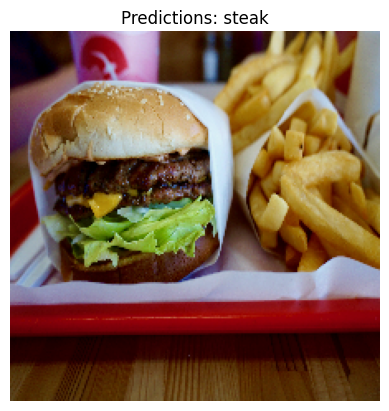

In [67]:
# Make a prediction using model 10
pred_and_plot(model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

Looks like our model didn're perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data

## Saving and loading our model

In [69]:
# Save a model
model_10.save("saved_trained_model_10")

In [70]:
#Load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 1.8276 - accuracy: 0.3768


[1.8276407718658447, 0.376800000667572]

In [71]:
# Compate our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 13s 168ms/step - loss: 1.8276 - accuracy: 0.3768


[1.8276413679122925, 0.376800000667572]